# Deep Learning für Visual Computing: Übungsblatt 04


**Von: Maximilian Mundt, Radmehr Nouri Inanlou**

**Abgabe: 11.05.2022**

## Importe

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## a) Dataset und Dataloader

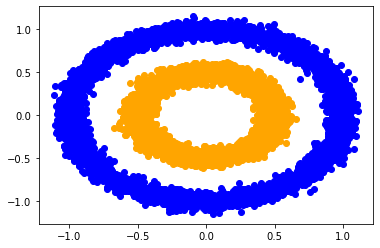

In [1]:
from visualize import show_synthetic_data
from torch.utils.data import DataLoader
from handout import CircelsDataset


dataset = CircelsDataset()

show_synthetic_data(dataset.points, dataset.labels)

In [76]:
dataloader = DataLoader(dataset, batch_size=64)
new_points = torch.cat([points for points, _ in dataloader])
new_labels = torch.cat([labels for _, labels in dataloader])

new_dataset = [new_points, new_labels]

Wenn am Ende nicht mehr genug Daten vorhanden sind, um ein Batch mit z.B. 64 Elementen zu füllen, dann wird dieses Batch mit den verbleibenden Elementen gefüllt. Hier sind dies 16.

## b) Grundlagen MLP und Aktivierungsfunktionen